# Analysis of Uber Data with Respect to Time

In this section, we explore the Uber dataset with a focus on time-based analysis, including trip duration, monthly statistics, and the most popular destinations and trip purposes by month.

## 1. Data Preprocessing

The data is cleaned and prepared for analysis with the following steps:
- **Date Conversion**: The `START_DATE` and `END_DATE` columns are converted into datetime format to facilitate time-based analysis.
- **Handling Missing Data**: Rows with invalid or missing `START_DATE` or `END_DATE` values are dropped to ensure accuracy in the analysis.
- **Trip Duration**: The duration of each trip is calculated by subtracting `START_DATE` from `END_DATE` and converting the result from seconds to minutes.
- **Month Extraction**: A new column, `MONTH`, is created by extracting the month from the `START_DATE`.

## 2. Monthly Statistics

We calculate and visualize the following monthly statistics:
- **Total Trips**: The number of trips per month.
- **Total Miles**: The sum of miles traveled per month.
- **Most Common Purpose**: The most frequent purpose of trips for each month.

These statistics are computed by grouping the data by month and aggregating the relevant values. The month numbers are then converted to month names for easier interpretation.

### Visualization: Heatmaps

Two heatmaps are generated to show the relationship between months and the total number of trips, as well as the total miles traveled:
- **Total Trips Heatmap**: Displays the number of trips each month.
- **Total Miles Heatmap**: Displays the total miles traveled each month.

The heatmaps help in visually comparing the variations in trips and miles across different months.

## 3. Total Miles vs. Total Trips Bar Plot

A bar plot is created to compare the total miles traveled and the total number of trips for each month. This helps in understanding how the number of trips relates to the total distance covered each month.

## 4. Most Popular Destinations by Month

The analysis is extended to identify the most popular destination for each month. The data is grouped by month and destination (`STOP`), and the most popular destination is selected by counting the occurrences of each destination. This is visualized using a bar plot with months on the x-axis and the number of trips to each destination on the y-axis.

## 5. Top 5 Trip Purposes by Month

We also explore the distribution of the top 5 most frequent trip purposes across the months. The data is grouped by `PURPOSE` and `MONTH`, and the most common purposes are selected based on their total counts across all months. The results are visualized with a line plot that shows the trend of each purpose throughout the year.

### Conclusion

This analysis provides insights into the Uber dataset by examining trip frequency, distance, and purpose trends over time. The heatmaps and plots reveal patterns in travel behavior, helping us understand seasonal trends and the popularity of destinations and trip purposes.

In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For creating statistical visualizations
import calendar  # For handling month names and dates

# Read the CSV file into a pandas DataFrame
# Load the dataset from the provided file 'UberDataset.csv'
uber_data = pd.read_csv('UberDataset.csv')  

# Convert the 'START_DATE' column to datetime format
# The 'errors="coerce"' argument ensures that any invalid date values are converted to NaT (Not a Time)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')

# Convert the 'END_DATE' column to datetime format
# This ensures that both 'START_DATE' and 'END_DATE' columns are in a consistent datetime format
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Drop rows with invalid 'START_DATE' or 'END_DATE' values
# These rows may have failed the datetime conversion and are no longer needed
uber_data = uber_data.dropna(subset=['START_DATE', 'END_DATE'])

# Calculate the trip duration in minutes
# The duration is computed by subtracting 'START_DATE' from 'END_DATE', which gives the time difference in seconds
# Then, the result is converted from seconds to minutes by dividing by 60
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

In [11]:
# Ensure MONTH is an integer by extracting the month from the 'START_DATE' column
# The 'dt.month' method extracts the month from the 'START_DATE' datetime column, and 'astype(int)' ensures it is of integer type
uber_data['MONTH'] = uber_data['START_DATE'].dt.month.astype(int)  

# Group by 'MONTH' and calculate statistics for each month
# - 'STOP': Count the number of trips (rows)
# - 'MILES': Sum of miles traveled for each month
# - 'PURPOSE': Find the most common purpose for each month (using the mode)
# If no mode is found, 'Unknown' is used
monthly_stats = uber_data.groupby('MONTH').agg({
    'STOP': 'count',  # Count of trips in each month
    'MILES': 'sum',   # Total miles traveled in each month
    'PURPOSE': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'  # Most common purpose of trips
}).reset_index()  # Reset index to convert 'MONTH' from index to column

# Convert month numbers (1-12) to month names (January, February, etc.)
# 'calendar.month_name' provides a list of month names where index 1 corresponds to 'January'
monthly_stats['MONTH'] = monthly_stats['MONTH'].apply(lambda x: calendar.month_name[x])

# Rename columns for better readability
# - 'MONTH' is changed to 'Month'
# - 'STOP' to 'Total_Trips'
# - 'MILES' to 'Total_Miles'
# - 'PURPOSE' to 'Most_Common_Purpose'
monthly_stats.columns = ['Month', 'Total_Trips', 'Total_Miles', 'Most_Common_Purpose']

# Print the summary statistics
print("\nMonthly Statistics Summary:")  # Add a title to the output for clarity
print(monthly_stats)  # Display the monthly statistics in tabular format


Monthly Statistics Summary:
        Month  Total_Trips  Total_Miles Most_Common_Purpose
0     January           23        183.6             Meeting
1    February           40        309.0      Meal/Entertain
2       March           42        259.3      Meal/Entertain
3       April           25        821.8             Meeting
4         May           26        239.0      Meal/Entertain
5        June           42        275.5             Meeting
6        July           40        333.1             Meeting
7      August           43        261.4      Customer Visit
8   September           13        172.2             Unknown
9     October           24        361.5             Meeting
10   November           63        400.6             Meeting
11   December           39        198.2      Customer Visit


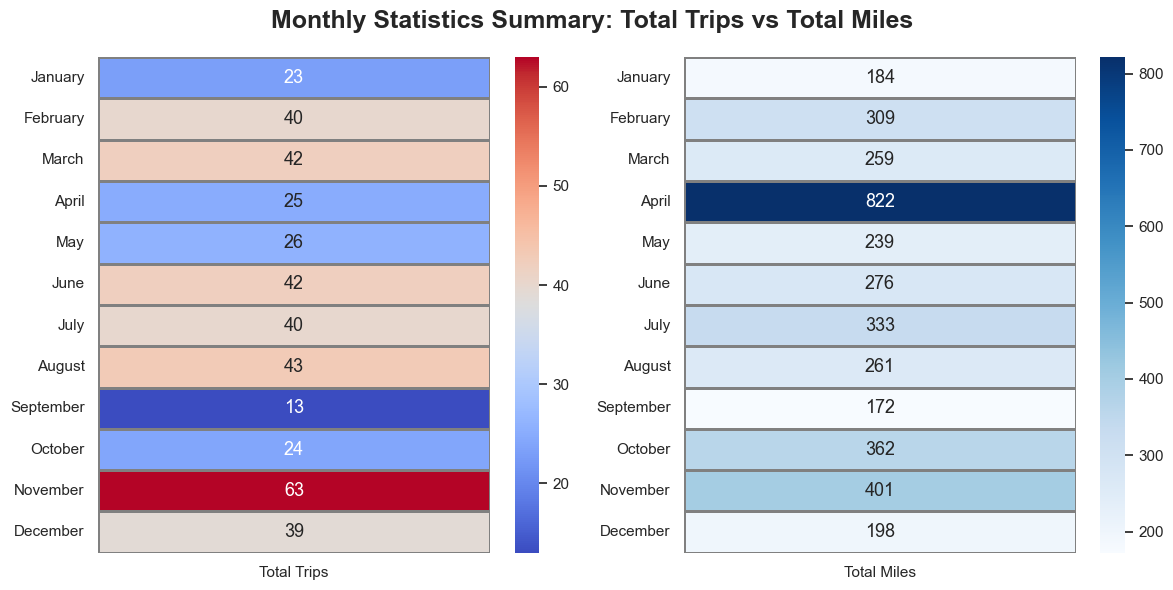

In [12]:
# Create a figure with a size suitable for displaying the heatmaps side by side
plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches

# Create the first heatmap for 'Total_Trips' with a different color palette
# This subplot will display the heatmap for the number of total trips per month
ax1 = plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, selecting the first subplot
sns.heatmap(
    monthly_stats[['Total_Trips']].set_index(monthly_stats['Month']),  # Set 'Month' as the index for the heatmap
    annot=True,  # Annotate each cell with the actual data value (number of trips)
    fmt=".0f",  # Format the values as integers (no decimal places)
    cmap="coolwarm",  # Use the 'coolwarm' color palette to represent values (for visual distinction)
    linewidths=1,  # Add lines between cells for clarity
    linecolor='gray',  # Set the line color for grid separation between cells
    annot_kws={"size": 13},  # Set the font size for the annotated values inside the cells
    xticklabels=['Total Trips'],  # Label the x-tick for the total trips column
    yticklabels=monthly_stats['Month'],  # Set the y-tick labels to the month names
)

# Create the second heatmap for 'Total_Miles' with a different color palette
# This subplot will display the heatmap for the total miles per month
ax2 = plt.subplot(1, 2, 2)  # Create a subplot with 1 row and 2 columns, selecting the second subplot
sns.heatmap(
    monthly_stats[['Total_Miles']].set_index(monthly_stats['Month']),  # Set 'Month' as the index for the heatmap
    annot=True,  # Annotate each cell with the actual data value (total miles)
    fmt=".0f",  # Format the values as integers (no decimal places)
    cmap="Blues",  # Use the 'Blues' color palette to represent values (for visual distinction)
    linewidths=1,  # Add lines between cells for clarity
    linecolor='gray',  # Set the line color for grid separation between cells
    annot_kws={"size": 13},  # Set the font size for the annotated values inside the cells
    xticklabels=['Total Miles'],  # Label the x-tick for the total miles column
    yticklabels=monthly_stats['Month'],  # Set the y-tick labels to the month names
)

# Add an overall figure title with padding
plt.suptitle('Monthly Statistics Summary: Total Trips vs Total Miles', fontsize=18, fontweight='bold')

# Remove the y-axis labels for both subplots to avoid redundancy
ax1.set_ylabel('')  # Remove y-label for the first heatmap
ax2.set_ylabel('')  # Remove y-label for the second heatmap

# Adjust layout to ensure the plots fit properly and don't overlap
plt.tight_layout()

# Show the plot with both heatmaps
plt.show()

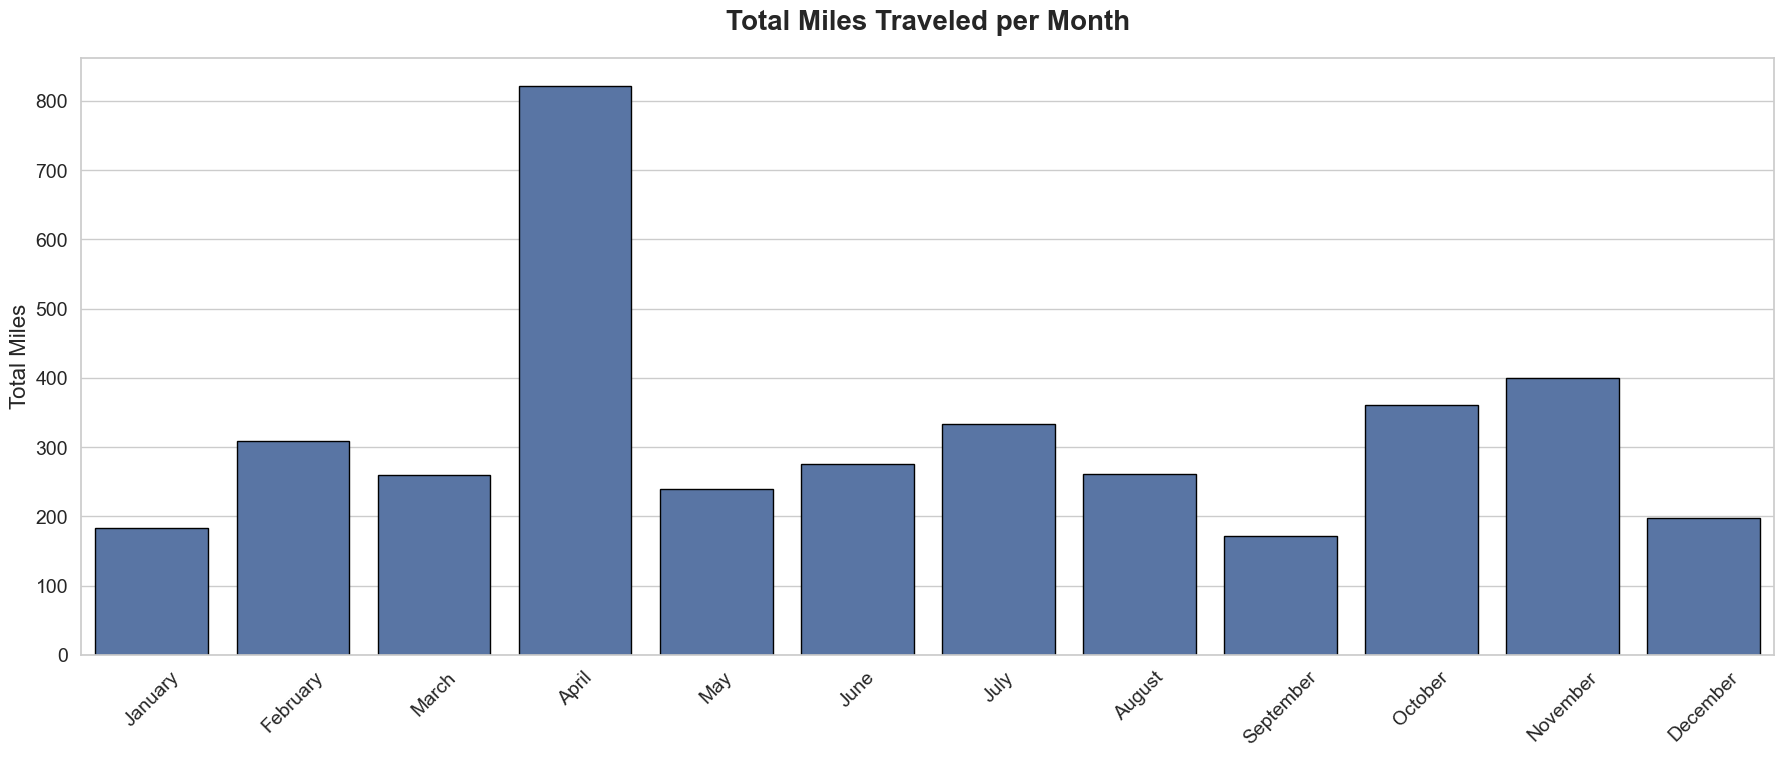

In [13]:
# Set Seaborn style for better visual appeal and gridlines
sns.set(style="whitegrid", context="notebook")  # "whitegrid" for background with grid lines for easy reading

# Increase the figure width and height to make the plot larger
plt.figure(figsize=(18, 8))  # Set the figure size to 18x8 inches for a wider and taller plot

# Create the barplot with custom colors and styling
bars = sns.barplot(
    data=monthly_stats,  # Use the 'monthly_stats' DataFrame as the data source
    x='Month',  # Set the x-axis to display months
    y='Total_Miles',  # Set the y-axis to display the total miles
    edgecolor='black',  # Add black edges around the bars for better contrast and definition
    dodge=False  # No need to split bars, since we are plotting a single variable
)

# Add a title to the plot with an increased font size and bold text
plt.title('Total Miles Traveled per Month', fontsize=20, fontweight='bold', pad=20)  # Title with padding for space

# Rotate x-axis labels for better readability and increase font size for visibility
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels by 45 degrees and set font size

# Style y-axis ticks with increased font size for better visibility
plt.yticks(fontsize=14)  # Increase font size of the y-axis ticks

# Label the axes with custom font sizes for clarity
plt.xlabel('Month', fontsize=16)  # Label x-axis as 'Month' with increased font size
plt.ylabel('Total Miles', fontsize=16)  # Label y-axis as 'Total Miles' with increased font size

# Adjust the layout to ensure everything fits properly without overlapping
plt.tight_layout()  # Automatically adjusts the plot to fit within the figure area

# Remove the x-axis labels
plt.xlabel('')

# Display the plot on screen
plt.show()  # Show the plot to the user

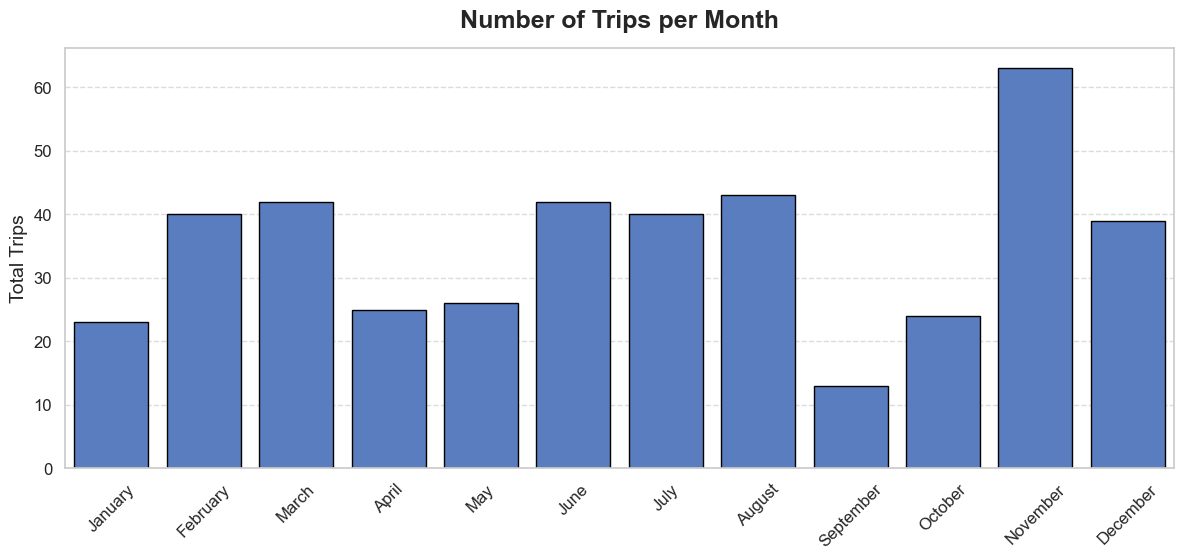

In [14]:
# Set Seaborn style and color palette for improved aesthetics
sns.set_style('whitegrid')  # White background with gridlines, useful for data visualization
sns.set_palette('muted')    # Muted color palette for softer colors, avoiding overly bright or flashy visuals

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size to 12x6 inches for a balanced plot
sns.barplot(data=monthly_stats, x='Month', y='Total_Trips', edgecolor='black')  # Create the barplot with black edges around bars

# Set plot title and axis labels with custom font sizes and styling
plt.title('Number of Trips per Month', fontsize=18, fontweight='bold', pad=15)  # Set the title with bold font and padding for space
plt.xlabel('Month', fontsize=14)  # Label the x-axis as 'Month' with a font size of 14
plt.ylabel('Total Trips', fontsize=14)  # Label the y-axis as 'Total Trips' with a font size of 14

# Adjust x-axis tick labels for better readability
plt.xticks(rotation=45, fontsize=12)  # Rotate the x-axis labels by 45 degrees and set font size to 12

# Customize y-axis tick labels
plt.yticks(fontsize=12)  # Set the font size of the y-axis tick labels to 12

# Add grid lines on the y-axis for better visual clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines, with dashed style and 70% transparency

# Tighten the layout to ensure everything fits well and avoids overlap
plt.tight_layout()  # Automatically adjusts the plot to fit within the figure area

# Remove the x-axis labels
plt.xlabel('')

# Display the plot
plt.show()  # Show the plot on the screen

In [15]:
# Filter out rows with invalid or missing END_DATE values
uber_data = uber_data[uber_data['END_DATE'].notna()]

# Extract the month from END_DATE
uber_data['MONTH'] = uber_data['END_DATE'].dt.month.astype(int)

# Group data by month and STOP column to find the most popular destination for each month
popular_destinations = uber_data.groupby(['MONTH', 'STOP']).size().reset_index(name='Count')
most_popular_destinations = popular_destinations.loc[popular_destinations.groupby('MONTH')['Count'].idxmax()]

# Convert month numbers to names
most_popular_destinations['MONTH'] = most_popular_destinations['MONTH'].apply(lambda x: calendar.month_name[x])
most_popular_destinations.columns = ['Month', 'Destination', 'Count']

# Display the results
print("Most Popular Destinations by Month:")
most_popular_destinations

Most Popular Destinations by Month:


,Month,Destination,Count
2,January,Fort Pierce,4
16,February,Cary,16
30,March,Cary,8
50,April,Cary,5
66,May,Cary,3
82,June,Cary,13
99,July,Cary,11
114,August,Cary,8
134,September,Unknown Location,10
139,October,Unknown Location,11


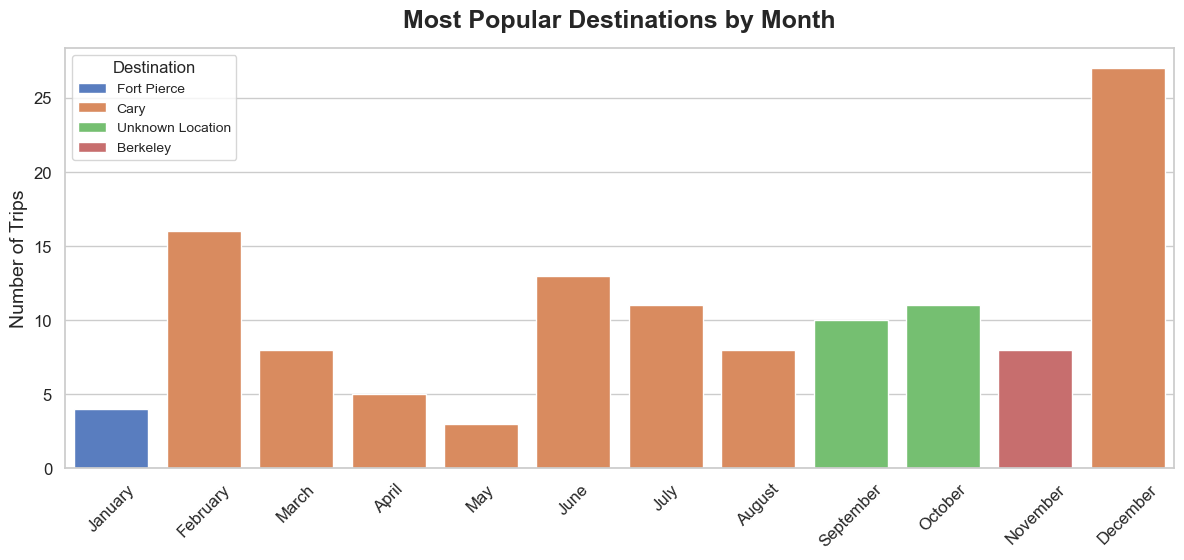

In [16]:
# Set Seaborn style and palette
sns.set_style('whitegrid')
sns.set_palette('muted')

# Create a bar plot to visualize the most popular destinations by month
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.barplot(x='Month', y='Count', data=most_popular_destinations, hue='Destination', dodge=False)

# Set plot title and axis labels with custom font sizes
plt.title('Most Popular Destinations by Month', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)

# Adjust x-ticks to make them more readable
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Shift the legend to the upper-left corner
plt.legend(title='Destination', fontsize=10, title_fontsize=12, loc='upper left')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Remove the x-axis labels
plt.xlabel('')

# Show the plot
plt.show()


In [17]:
# Group data by month and purpose, and calculate the count of trips for each purpose in each month
purpose_counts = uber_data.groupby(['MONTH', 'PURPOSE']).size().unstack()  # Group by 'MONTH' and 'PURPOSE', then unstack to pivot

# Sort purposes by their total count (sum across all months) and select the top 5 most frequent purposes
top_purposes = purpose_counts.sum().sort_values(ascending=False).head(5).index  # Sort purposes based on their total count and pick the top 5

# Select the top 5 purposes from the purpose_counts dataframe
purpose_counts_top5 = purpose_counts[top_purposes]  # Filter the data to include only the top 5 purposes

# Replace month numbers with their corresponding month names (January, February, etc.)
purpose_counts_top5.index = [calendar.month_name[x] for x in purpose_counts_top5.index]  # Use month names instead of month numbers for better readability

# Display the resulting table with the counts of top 5 purposes per month
purpose_counts_top5  # This shows the top 5 purposes, with months as rows and purpose types as columns

PURPOSE,Meeting,Meal/Entertain,Errand/Supplies,Customer Visit,Temporary Site
January,8.0,6.0,4.0,3.0,1.0
February,8.0,11.0,5.0,5.0,5.0
March,9.0,10.0,3.0,5.0,1.0
April,9.0,5.0,3.0,5.0,NaN
May,6.0,7.0,4.0,6.0,NaN
June,14.0,10.0,13.0,3.0,NaN
July,13.0,2.0,4.0,1.0,2.0
August,1.0,1.0,NaN,3.0,NaN
October,1.0,NaN,NaN,NaN,1.0
November,6.0,2.0,1.0,5.0,3.0


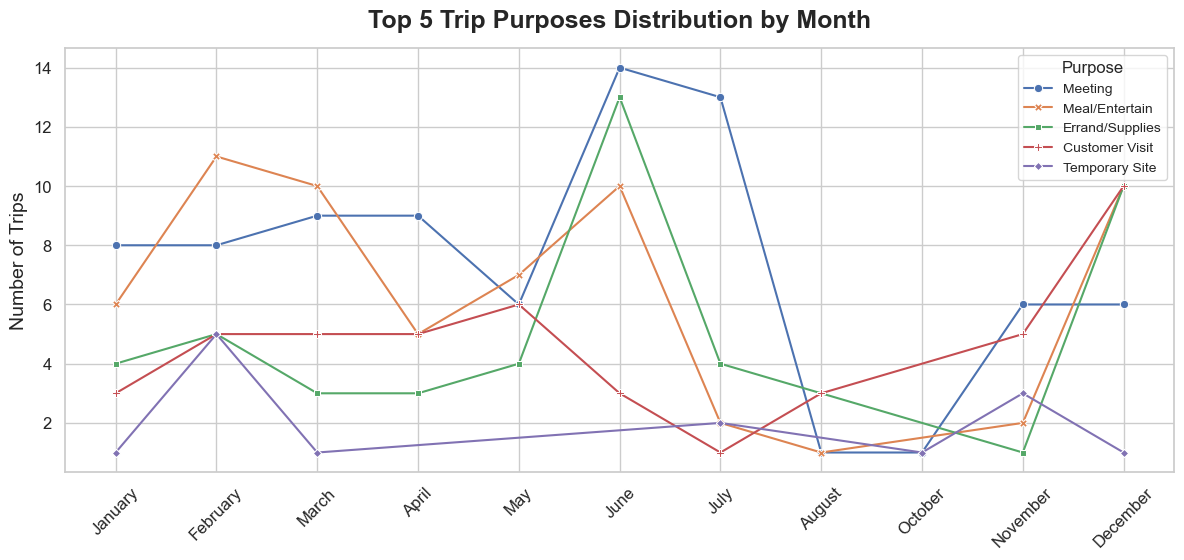

In [18]:
# Set Seaborn style for better visuals
sns.set_style('whitegrid')  # Use a clean grid background for better visual clarity
sns.set_palette('deep')  # Set a color palette for better differentiation of lines

# Create the line plot
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
sns.lineplot(data=purpose_counts_top5, markers=True, dashes=False)  # Create a line plot for the top 5 purposes, with markers on data points and solid lines (no dashes)

# Set plot title and labels with custom font sizes
plt.title('Top 5 Trip Purposes Distribution by Month', fontsize=18, fontweight='bold', pad=15)  # Title with bold font and padding for better spacing
plt.xlabel('Month', fontsize=14)  # X-axis label with specified font size
plt.ylabel('Number of Trips', fontsize=14)  # Y-axis label with specified font size

# Adjust x-ticks to make them more readable
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees for better readability and set font size
plt.yticks(fontsize=12)  # Set font size for y-axis ticks

# Add a legend and position it in the upper-right corner, with a smaller font size
plt.legend(title='Purpose', fontsize=10, title_fontsize=12, loc='upper right', frameon=True)  # Add a legend with customized font sizes and a border around it

# Add a tight layout to ensure all elements fit well
plt.tight_layout()  # Adjust layout to make sure labels, titles, and legend are properly spaced without overlap

# Remove the x-axis labels
plt.xlabel('')

# Display the plot
plt.show()  # Show the final plot